In [1]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import csv

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy/analysis/adata_updated/adata.h5ad"
adata=sc.read(fpath) 

In [4]:
adata_t=adata[adata.obs['celltype_category']=="T Cell"]
adata_b=adata[adata.obs['celltype_category'].isin(["B Cell", "B Cell plasma"])]
adata_mye=adata[adata.obs['celltype_category'].isin(["Myeloid"])]
adata_mes=adata[adata.obs['celltype_category'].isin(["Mesenchymal"])]
adata_epi=adata[adata.obs['celltype_category'].isin(["Stem cells", "Enterocyte", "Secretory"])]

In [5]:
Myeloid=['MAF','C1QA','SELENOP','CD209','CD163',
         'FLT3', 'CD1C','CD207',         
         'FOS','JUN','IL1B','ITGAX',
         'S100A8','S100A9','TREM1','OSM', 
         'MS4A2']

Mesenchymal=["COL1A2","COL3A1","COL1A1",
             "LUM","PECAM1","VWF","PLVAP",
             "ACKR1","CD36","THY1",
             "ACTA2","ACTG2","DES"]

In [6]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/clean_annotation/data-clean_annotation-markers.csv"
df1=pd.read_table(fpath, sep=',')

Trying to set attribute `.obs` of view, copying.


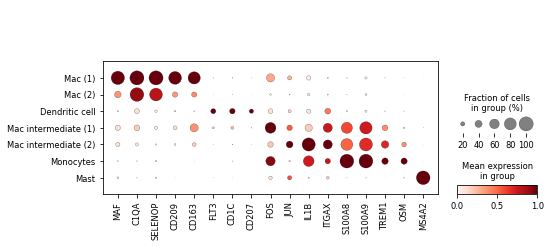

In [7]:
adata_mye.obs['celltype_label']=pd.Categorical(adata_mye.obs['celltype_label'], categories=list(df1[df1.category=="Myeloid"].label.values))
sc.pl.dotplot(adata_mye, Myeloid, groupby='celltype_label',
                  gene_symbols='gene_symbols', 
                  dendrogram=False,
                   #var_group_rotation=360,
                  #var_group_labels=df2.category,
                  standard_scale='var', show=True, swap_axes=False,
                  save="dotplot_myeloid.pdf") 

Trying to set attribute `.obs` of view, copying.


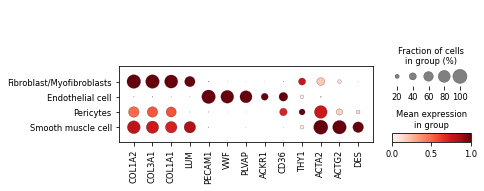

In [8]:
adata_mes.obs['celltype_label']=pd.Categorical(adata_mes.obs['celltype_label'], categories=list(df1[df1.category=="Mesenchymal"].label.values))
sc.pl.dotplot(adata_mes, Mesenchymal, groupby='celltype_label',
                  gene_symbols='gene_symbols', 
                  dendrogram=False,
                   #var_group_rotation=360,
                  #var_group_labels=df2.category,
                  standard_scale='var', show=True, swap_axes=False,
                  save="dotplot_mesenchymal.pdf") 

In [53]:
out=list(dict.fromkeys(out))

In [54]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/clean_annotation/data-clean_annotation-markers.csv"
df1=pd.read_table(fpath, sep=',')


In [55]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/dotplot_markers.csv"
df=pd.read_table(fpath, sep=',')

In [56]:
df=df[['category', 'markers']]
ll=df.markers.str.split(expand=True)
df1=pd.concat([df, ll], axis=1)
df1=df1.drop(columns=['markers'])
df2=pd.melt(df1, id_vars=['category'])
df2=df2.drop(columns=['variable'])
df2=df2.dropna()
df2
label=np.unique(df['category'])

out = {}                                                               
for j in df2["category"].tolist(): 
    out[j] = df2[df2["category"]==j]["value"].tolist() 
out

{'Stem cells': ['LGR5', 'ASCL2', 'MYC', 'GPX2', 'MKI67'],
 'Enterocyte': ['GPX2',
  'OLFM4',
  'EPHB2',
  'ADH1C',
  'KRT20',
  'FABP1',
  'ALPI',
  'APOA4',
  'APOC3',
  'BEST4',
  'CA7'],
 'Secretory': ['DEFA5',
  'DEFA6',
  'MKI67',
  'MUC2',
  'REG4',
  'ATOH1',
  'SPINK4',
  'TFF1',
  'CHGA',
  'NEUROD1',
  'POU2F3',
  'PTGS1',
  'PLCG2'],
 'Mesenchymal': ['COL1A2',
  'COL3A1',
  'COL1A1',
  'LUM',
  'PECAM1',
  'VWF',
  'PLVAP',
  'ACKR1',
  'CD36',
  'THY1',
  'ACTA2',
  'ACTG2',
  'DES'],
 'Myeloid': ['S100A8',
  'S100A9',
  'TREM1',
  'FOS',
  'JUN',
  'IL1B',
  'OSM',
  'ITGAX',
  'MAF',
  'C1QA',
  'SELENOP',
  'CD209',
  'CD163',
  'FLT3',
  'CD1C',
  'CD207',
  'MS4A2'],
 'T Cell': ['CD3D',
  'NCAM1',
  'FCER1G',
  'CD3D',
  'IL23R',
  'KIT',
  'CD40LG',
  'IL7R',
  'CD4',
  'FOXP3',
  'MAF',
  'CCR7',
  'SELL',
  'LEF1',
  'CD4',
  'CKS1B',
  'CD8A',
  'CD8B',
  'GZMK',
  'NKG7',
  'IL10RA',
  'TRGC1',
  'TRGC2',
  'GZMA'],
 'B Cell': ['IGHD',
  'IGHM',
  'FCER2',
  'STMN

In [57]:
#adata.obs['celltype_label']=pd.Categorical(adata.obs['celltype_label'], categories=list(df.label))


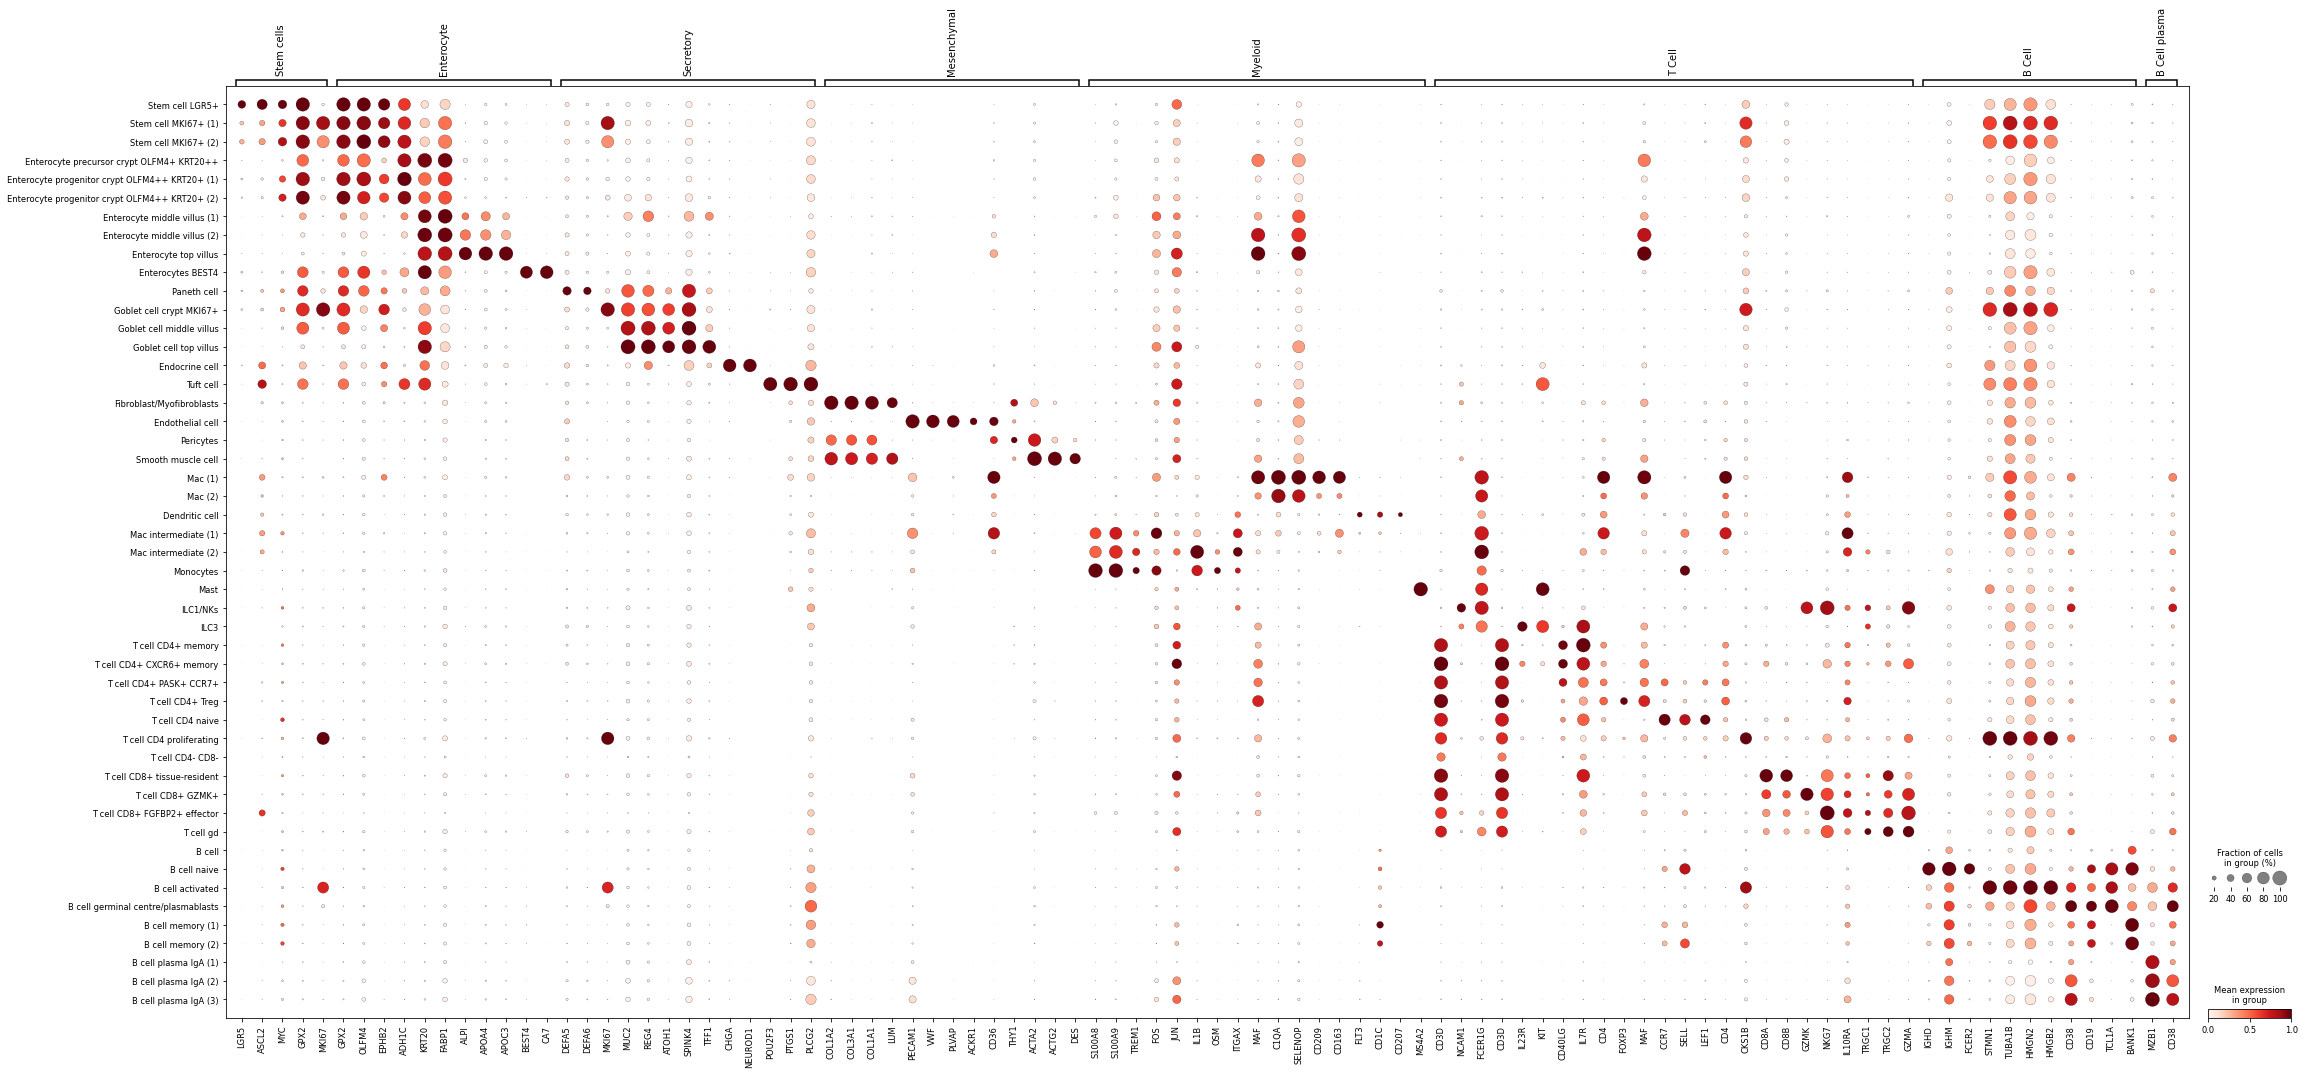

In [59]:
sc.pl.dotplot(adata, out, groupby='celltype_label',
                  gene_symbols='gene_symbols', 
                  dendrogram=False,
                   #var_group_rotation=360,
                  #var_group_labels=df2.category,
                  standard_scale='var', show=True, swap_axes=False,
                  save="dotplot_markers.pdf") 

In [24]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/clean_annotation/data-clean_annotation-markers.csv"
df=pd.read_table(fpath, sep=',')
df=df[['category', 'label', 'markers']]
ll=df.markers.str.split(expand=True)
df1=pd.concat([df, ll], axis=1)
df1
df1=df1.drop(columns=['markers'])
df2=pd.melt(df1, id_vars=['category', 'label'])
df2=df2.drop(columns=['variable'])
df2=df2.dropna()
np.unique(df2.value.values)

array(['ACKR1', 'ACTA2', 'ACTG2', 'ADH1C', 'AHR', 'ALPI', 'APOA4',
       'APOC3', 'ASCL2', 'ATOH1', 'BANK1', 'BEST4', 'C1QA', 'C1QB',
       'C1QC', 'CA7', 'CCR2', 'CCR7', 'CD14', 'CD19', 'CD1C', 'CD1E',
       'CD209', 'CD36', 'CD38', 'CD3D', 'CD4', 'CD40LG', 'CD8A', 'CD8B',
       'CFP', 'CHGA', 'CKS1B', 'CMA1', 'COL1A1', 'COL1A2', 'COL3A1',
       'CSF3R', 'CXCL8', 'DEFA5', 'DEFA6', 'DES', 'EEF1A1', 'EPHB2',
       'FABP1', 'FAU', 'FCER1A', 'FCER1G', 'FCER2', 'FCGR3A', 'FOXP3',
       'GPX2', 'GZMA', 'GZMK', 'HMGB2', 'HMGN2', 'IGHD', 'IGHM', 'IL10RA',
       'IL1RN', 'IL23R', 'IL7R', 'KIT', 'KRT20', 'LEF1', 'LGR5', 'LUM',
       'MAF', 'MKI67', 'MUC2', 'MYC', 'MZB1', 'NCAM1', 'NEUROD1', 'NKG7',
       'OLFM4', 'OSM', 'PECAM1', 'PLCG2', 'PLVAP', 'POU2F3', 'PTGS1',
       'REG4', 'RPS14', 'RRM2', 'S100A8', 'SELL', 'SPINK4', 'STMN1',
       'TCL1A', 'TFF1', 'THY1', 'TPSAB1', 'TRGC1', 'TRGC2', 'TUBA1B',
       'UBA52', 'VWF'], dtype=object)

In [25]:
adata.obs['celltype_label']=pd.Categorical(adata.obs['celltype_label'], categories=list(out.keys()))


AttributeError: 'list' object has no attribute 'keys'

In [ ]:


label=np.unique(df['label'])

out = {}                                                               
for j in df2["label"].tolist(): 
    out[j] = df2[df2["label"]==j]["value"].tolist() 

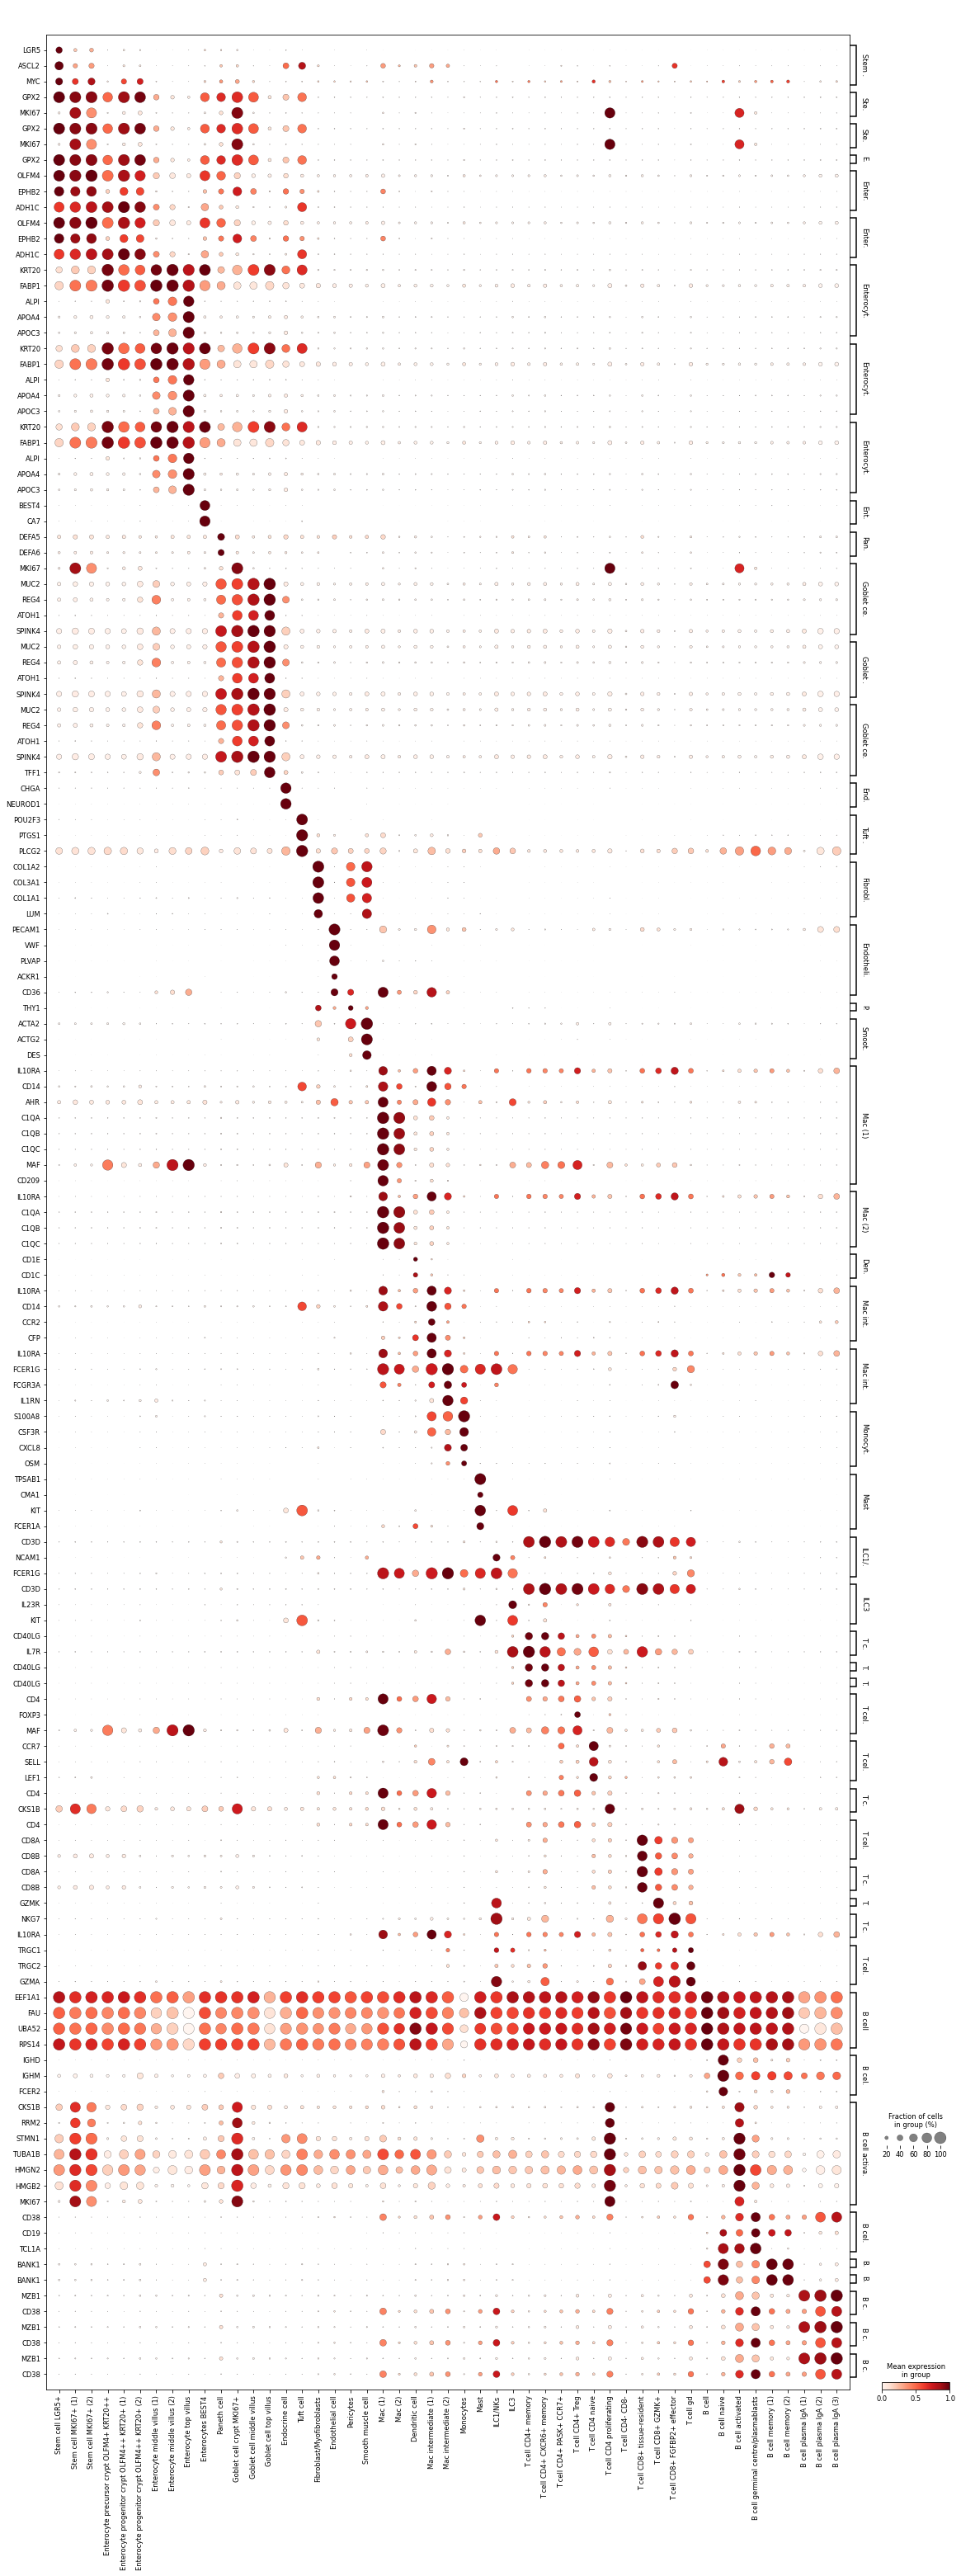

In [100]:
sc.pl.dotplot(adata, out, groupby='celltype_label',
                  gene_symbols='gene_symbols', 
                  dendrogram=False,
                   #var_group_rotation=360,
                  #var_group_labels=df2.category,
                  standard_scale='var', show=True, swap_axes=True,
                  save="dotplot_markers.pdf") 

In [ ]:
#df2=df2.dropna()
#df2=df2.drop_duplicates()
#df2

In [4]:
#file="/home/ubuntu/ubuntu/data/scibd/gut-freeze003/analysis/IBD_genes_Carl.csv"
#df=pd.read_table(file, sep=',')
#df=df[df['confidence']==1000]
#df.loc[df['gene']=="INAVA|C1orf106",'gene']="INAVA"

In [5]:
#sc.tl.dendrogram(adata, groupby='cell_type')
#sc.tl.dendrogram(adata, groupby='major_cell_type')

In [6]:
#sc.pl.dotplot(adata, list(df['gene']) , groupby='major_cell_type',
#                  gene_symbols='gene_symbols', dendrogram=True,
#                  standard_scale='var', show=True, save="45_IBD_genes")

In [26]:
adata_t=adata[adata.obs['celltype_category']=="T Cell"]
adata_b=adata[adata.obs['celltype_category'].isin(["B Cell", "B Cell plasma"])]
adata_mye=adata[adata.obs['celltype_category'].isin(["Myeloid"])]
adata_mes=adata[adata.obs['celltype_category'].isin(["Mesenchymal"])]
adata_epi=adata[adata.obs['celltype_category'].isin(["Stem cells", "Enterocyte", "Secretory"])]

In [12]:
#fpath="/home/ubuntu/ubuntu/data/scibd/gut-freeze003/analysis/cell_type_markers.tsv"
#df=pd.read_table(fpath, sep='\t')
#df=df[['major_cell_type', 'cell_type', 'cell_type_markers']]
#df=df[df['major_cell_type'].isin(["Stem cells", "Enterocyte", "Secretory", "Tuft cell"])]

In [13]:
#ll=df.cell_type_markers.str.split(expand=True)
#df1=pd.concat([df, ll], axis=1)
#df2=pd.melt(df1, id_vars=['major_cell_type', 'cell_type','cell_type_markers'])
#df2=df2.dropna()
#df2=df2.drop_duplicates()

In [14]:
#out = {}                                                               
#for j in df2["cell_type"].tolist(): 
#    out[j] = df2[df2["cell_type"]==j]["value"].tolist() 
#out

NameError: name 'df2' is not defined

In [15]:
out_t = { 
    
     'ILC1 CD3D- NCAM1+': ['CD3D', 'NCAM1','FCER1G'],
     'ILC3 CD3D- IL23R+': ['CD3D', 'IL23R', 'KIT'],
     'T cell CD4 CD40LG+ (1)': ['CD40LG', 'IL7R'],
     'T cell CD4 CD40LG+ (2)': ['CD40LG'],
     'T cell CD4 CD40LG+ (3)': ['CD40LG'],
     'T cell CD4 Treg': ['CD4', 'FOXP3', 'MAF'],
     'T cell CD4 naïve': ['CCR7', 'SELL', 'LEF1'],
     'T cell CD4 proliferating': ['CD4', 'CKS1B',
     'RRM2', 'STMN1', 'TUBA1B', 'HMGN2',
     'HMGB2', 'MKI67'],
     'T cell CD4- CD8-': ['CD4', 'CD8A', 'CD8B'],       
     'T cell CD8 (1)': ['CD8A', 'CD8B'],
     'T cell CD8 (2)': ['GZMK'],
     'T cell CD8 (3)': ['NKG7', 'IL10RA'],
     'T cell gd': ['TRGC1', 'TRGC2', 'GZMA'], #'CD7',
    
}

In [27]:
adata_t.obs['celltype_label']

TATCTGTGTCACGACC-1-5892STDY8039553        T cell CD4 proliferating
CACACAAGTTTACTTC-1-5892STDY8039553     T cell CD8+ tissue-resident
CTCGAGGTCTCGAGTA-1-5892STDY8039553        T cell CD4 proliferating
CCTATCGGTCGATGCC-1-5892STDY8039553     T cell CD8+ tissue-resident
ATCCACCCAACCCTCT-1-5892STDY8039553              T cell CD4+ memory
                                                  ...             
GAACTGTAGAGGACTC-1-OTARscRNA9342936               T cell CD4 naive
GAGTTACCACTAACCA-1-OTARscRNA9342936              T cell CD8+ GZMK+
ACGGAAGCACTCAAGT-1-OTARscRNA9342936              T cell CD8+ GZMK+
AGACTCACAAGAGATT-1-OTARscRNA9342936               T cell CD4 naive
GTACAGTCAGGTACGA-1-OTARscRNA9342936               T cell CD4- CD8-
Name: celltype_label, Length: 43673, dtype: category
Categories (13, object): ['ILC1/NKs', 'ILC3', 'T cell CD4 naive', 'T cell CD4 proliferating', ..., 'T cell CD8+ FGFBP2+ effector', 'T cell CD8+ GZMK+', 'T cell CD8+ tissue-resident', 'T cell gd']

In [19]:
adata_t.obs['celltype_label']=pd.Categorical(adata_t.obs['celltype_label'], categories=list(out_t.keys()))


ValueError: arange: cannot compute length

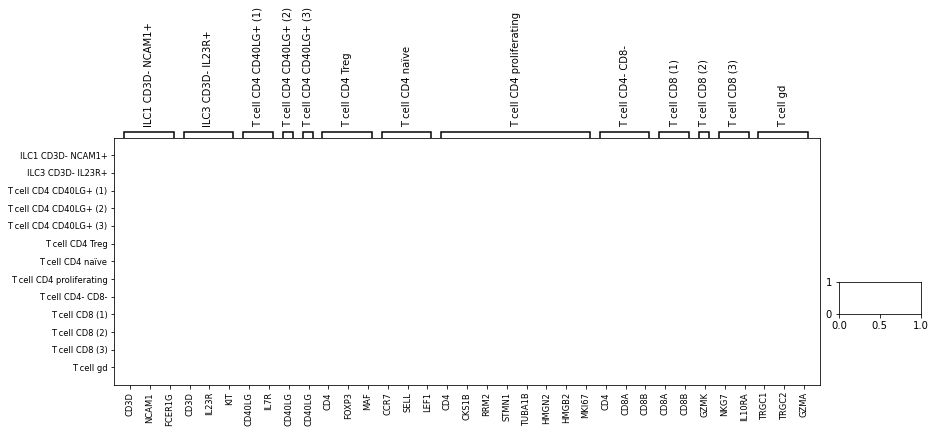

In [21]:
#sc.tl.dendrogram(adata_t, groupby='celltype_label')
sc.pl.dotplot(adata_t, out_t, groupby='celltype_label',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var', show=True, save="t_cell") 

In [584]:
out_b = {      'B cell activated': ['CKS1B', 'RRM2', 'STMN1',
     'TUBA1B', 'HMGN2', 'HMGB2','MKI67'],
     'B cell germinal centre/plasmablasts': ['CD38','CD19', 'TCL1A'],
            'B cell memory (1)': ['BANK1'],
     'B cell memory (2)': ['BANK1'],
         'B cell naïve': ['IGHD', 'IGHM', 'FCER2'],
         'B cell': ['EEF1A1', 'FAU', 'UBA52', 'RPS14'],        
  'B cell plasma IgA CD38+': ['MZB1', 'CD38'],
     'B cell plasma IgA CD38++': ['MZB1', 'CD38'],
     'B cell plasma IgA CD38+++': ['MZB1', 'CD38'],
}

Trying to set attribute `.obs` of view, copying.


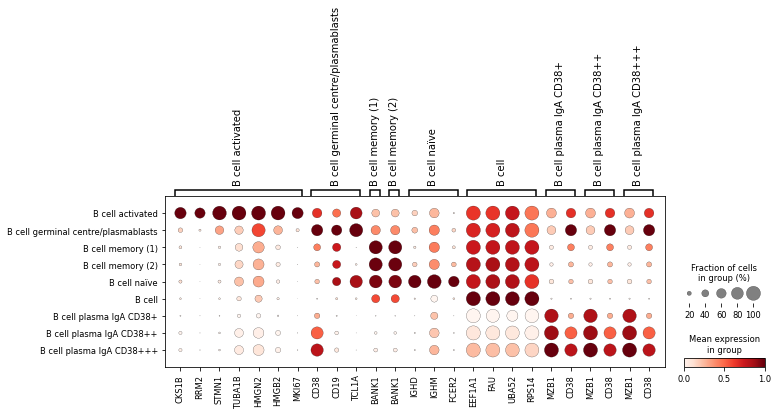

In [585]:
adata_b.obs['cell_type']=pd.Categorical(adata_b.obs['cell_type'], categories=list(out_b.keys()))
sc.tl.dendrogram(adata_b, groupby='cell_type')
sc.pl.dotplot(adata_b, out_b, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var', show=True, save="b_cell") 

In [586]:
out_mye = {  
            'Monocytes': ['FCGR3B', 'FCGR1A','CSF3R', ], #'S100A8','CSF3R','CXCL8','OSM' 
             'MoMac IL10RA-': ['IL10RA','FCER1G','FCGR3A', 'IL1RN',
              'TNF','IL6','IL1A','CXCL9','IL1B'],
             'MoMac IL10RA+': ['IL10RA','CD14','CCR2', 'CFP'],
             'Dendritic cell': ['CD1E','CD1C'],
               'Mac resident IL10RA+': ['IL10RA','CD14','AHR',
              'C1QA', 'C1QB','C1QC','MAF','CD209'],
               'Mac resident IL10RA-': ['IL10RA','C1QA', 'C1QB', 'C1QC'],
             'Mast': ['TPSAB1', 'CMA1', 'KIT', 'FCER1A'],
            }

Trying to set attribute `.obs` of view, copying.


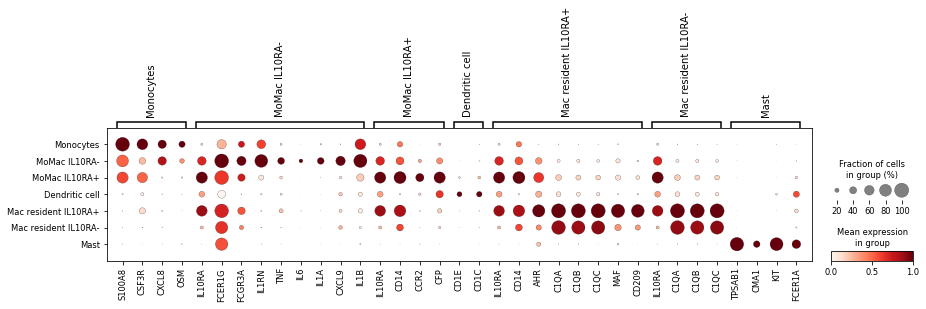

In [587]:
adata_mye.obs['cell_type']=pd.Categorical(adata_mye.obs['cell_type'], categories=list(out_mye.keys()))
sc.tl.dendrogram(adata_mye, groupby='cell_type')
sc.pl.dotplot(adata_mye, out_mye, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var', show=True, save="myeloid") 

In [588]:
out_mes = {'Endothelial cell': ['PECAM1', 'VWF', 'PLVAP', 'ACKR1', 'CD36'],
            'Pericytes': ['THY1'],
         'Fibroblast/Myofibroblasts': ['COL1A2', 'COL3A1', 'COL1A1', 'LUM'],
         'Smooth muscle cell': ['ACTA2', 'ACTG2', 'DES']}

Trying to set attribute `.obs` of view, copying.


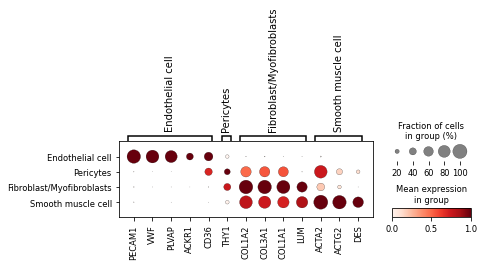

In [589]:
adata_mes.obs['cell_type']=pd.Categorical(adata_mes.obs['cell_type'], categories=list(out_mes.keys()))
sc.tl.dendrogram(adata_mes, groupby='cell_type')
sc.pl.dotplot(adata_mes, out_mes, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var', show=True, save="mesenchymal") 

In [590]:
out_epi = {'Stem cell LGR5+': ['LGR5','ASCL2', 'MYC'],
            'Stem cell MKI67+ (1)': ['GPX2','MKI67'],
            'Stem cell MKI67+ (2)': ['GPX2','MKI67'],
 'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)': ['OLFM4','EPHB2', 'ADH1C'],
  'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)': ['OLFM4','EPHB2', 'ADH1C'],
 'Enterocyte precursor crypt OLFM4+ KRT20++': ['GPX2'],
 'Enterocyte middle villus (1)': ['KRT20', 'FABP1', 'ALPI', 'APOA4', 'APOC3'],
 'Enterocyte middle villus (2)': ['KRT20', 'FABP1','ALPI', 'APOA4', 'APOC3'],
 'Enterocyte top villus': ['KRT20', 'FABP1', 'ALPI', 'APOA4', 'APOC3'],
  'Enterocytes BEST4': [ 'BEST4', 'CA7'],
 'Endocrine cell': ['CHGA', 'NEUROD1'],   
        'Goblet cell crypt MKI67+': ['MKI67', 'MUC2', 'REG4', 'ATOH1', 'SPINK4'],
        'Goblet cell middle villus': ['MUC2', 'REG4', 'ATOH1', 'SPINK4'],
        'Goblet cell top villus': ['MUC2', 'REG4', 'ATOH1', 'SPINK4', 'TFF1'],
             'Paneth cell': ['DEFA5', 'DEFA6'], 
           'Tuft cell': ['POU2F3', 'PTGS1', 'PLCG2'],
          }

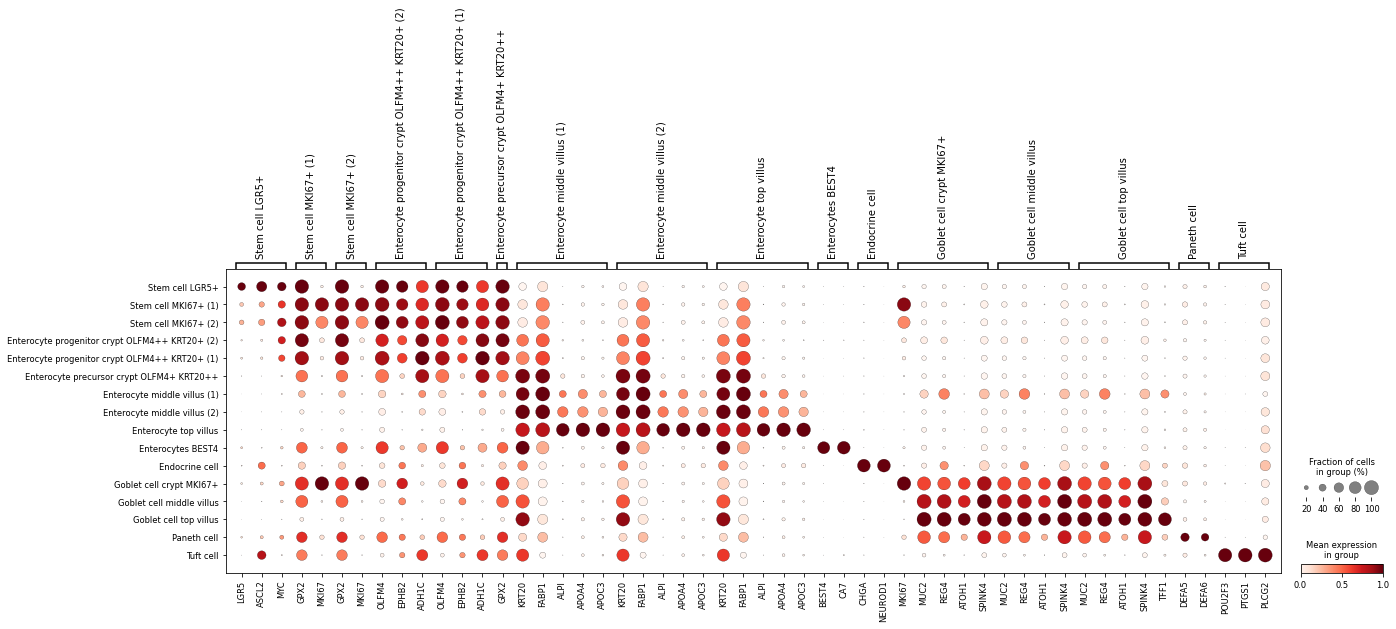

In [591]:
adata_epi.obs['cell_type']=pd.Categorical(adata_epi.obs['cell_type'], categories=list(out_epi.keys()))
sc.tl.dendrogram(adata_epi, groupby='cell_type')
sc.pl.dotplot(adata_epi, out_epi, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var', show=True, save="epithelial") 

In [311]:
#lala.add_totals().style(dot_edge_color='black', dot_edge_lw=0.5).show()

In [78]:
sc.pl.rank_genes_groups(
        adata,
        groups="cell_type",
        gene_symbols='gene_symbols',
        n_genes=4
    )

KeyError: 'names'

<Figure size 1728x864 with 0 Axes>

In [46]:
fpath="/home/ubuntu/ubuntu/data/scibd/gut-freeze003/analysis/cell_type_markers.tsv"
df=pd.read_table(fpath, sep='\t')

In [47]:
fpath="/home/ubuntu/ubuntu/data/scibd/gut-freeze003/analysis/cell_type_markers.tsv"
df=pd.read_table(fpath, sep='\t')
df=df[['major_cell_type', 'cell_type', 'cell_type_markers']]
ll=df1.cell_type_markers.str.split(expand=True)
df1=pd.concat([df, ll], axis=1)
df2=pd.melt(df1, id_vars=['major_cell_type', 'cell_type','cell_type_markers'])
df2=df2.dropna()
df2=df2.drop_duplicates()
df2

,major_cell_type,cell_type,cell_type_markers,variable,value
0,T Cell,T cell CD8 (1),CD8A IL7R KLRB1 NKG7 TRGC2,0,CD8A
1,B Cell,B cell naïve,BANK1 CD19 MS4A1 IGHD IGHM TCL1A FCER2,0,BANK1
2,B Cell plasma,B cell plasma IgA CD38++,MZB1 CD38 XBP1,0,MZB1
3,B Cell,B cell memory (1),BANK1 CD19 MS4A1,0,BANK1
4,T Cell,T cell CD4 CD40LG+ (1),CD4 IL7R KLRB1 CD40LG,0,CD4
...,...,...,...,...,...
383,T Cell,ILC1 CD3D- NCAM1+,TRDC TRGC1 TRGC2 FCER1G NKG7 GZMA NCAM1 GZMB,7,GZMB
387,T Cell,T cell CD4 proliferating,CD4 CKS1B RRM2 STMN1 TUBA1B HMGN2 HMGB2 MKI67,7,MKI67
424,Myeloid,Mac resident IL10RA+,FCER1G TYROBP MAF AHR IL10RA C1QA C1QB C1QC CD209,8,CD209
428,Myeloid,MoMac IL10RA-,FCGR3A TYROBP IL1RN CXCL8 TNF IL1A IL6 CXCL9 I...,8,IL10RA


In [48]:
#out = {}                                                               
#for j in df2["major_cell_type"].tolist(): 
#    out[j] = df2[df2["major_cell_type"]==j]["value"].tolist() 
  

In [49]:
ax = sc.pl.heatmap(adata, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

NameError: name 'marker_genes_dict' is not defined

In [54]:
out

{'T Cell': ['CD8A',
  'CD4',
  'CD4',
  'CD4',
  'CD4',
  'CD4',
  'IL10RA',
  'TRDC',
  'CD4',
  'IL10RA',
  'TRDC',
  'CD4',
  'TRDC',
  'IL7R',
  'IL7R',
  'CCR7',
  'IL7R',
  'IL7R',
  'IL10RA',
  'CD8A',
  'TRGC1',
  'CD8A',
  'CD8A',
  'TRGC1',
  'CKS1B',
  'TRGC1',
  'KLRB1',
  'KLRB1',
  'SELL',
  'KLRB1',
  'KLRB1',
  'MAF',
  'CD8B',
  'TRGC2',
  'CD8B',
  'CD8B',
  'TRGC2',
  'RRM2',
  'FCER1G',
  'NKG7',
  'CD40LG',
  'LEF1',
  'CD40LG',
  'CD40LG',
  'FOXP3',
  'NKG7',
  'FCER1G',
  'NKG7',
  'FCER1G',
  'STMN1',
  'IL23R',
  'TRGC2',
  'GZMA',
  'GZMK',
  'NKG7',
  'TRGC2',
  'NKG7',
  'TUBA1B',
  'KIT',
  'NKG7',
  'GZMA',
  'GZMA',
  'GZMA',
  'GZMA',
  'HMGN2',
  'NCAM1',
  'HMGB2',
  'GZMB',
  'MKI67'],
 'B Cell': ['BANK1',
  'BANK1',
  'BANK1',
  'BANK1',
  'CD38',
  'CD38',
  'CD19',
  'CD19',
  'CD19',
  'CD19',
  'CD19',
  'CKS1B',
  'MS4A1',
  'MS4A1',
  'MS4A1',
  'MS4A1',
  'TCL1A',
  'RRM2',
  'IGHD',
  'MS4A1',
  'STMN1',
  'IGHM',
  'XBP1',
  'TUBA1B',
  'TC

categories: B cell, B cell activated, B cell germinal centre/plasmablasts, etc.
var_group_labels: T Cell, B Cell, B Cell plasma, etc.


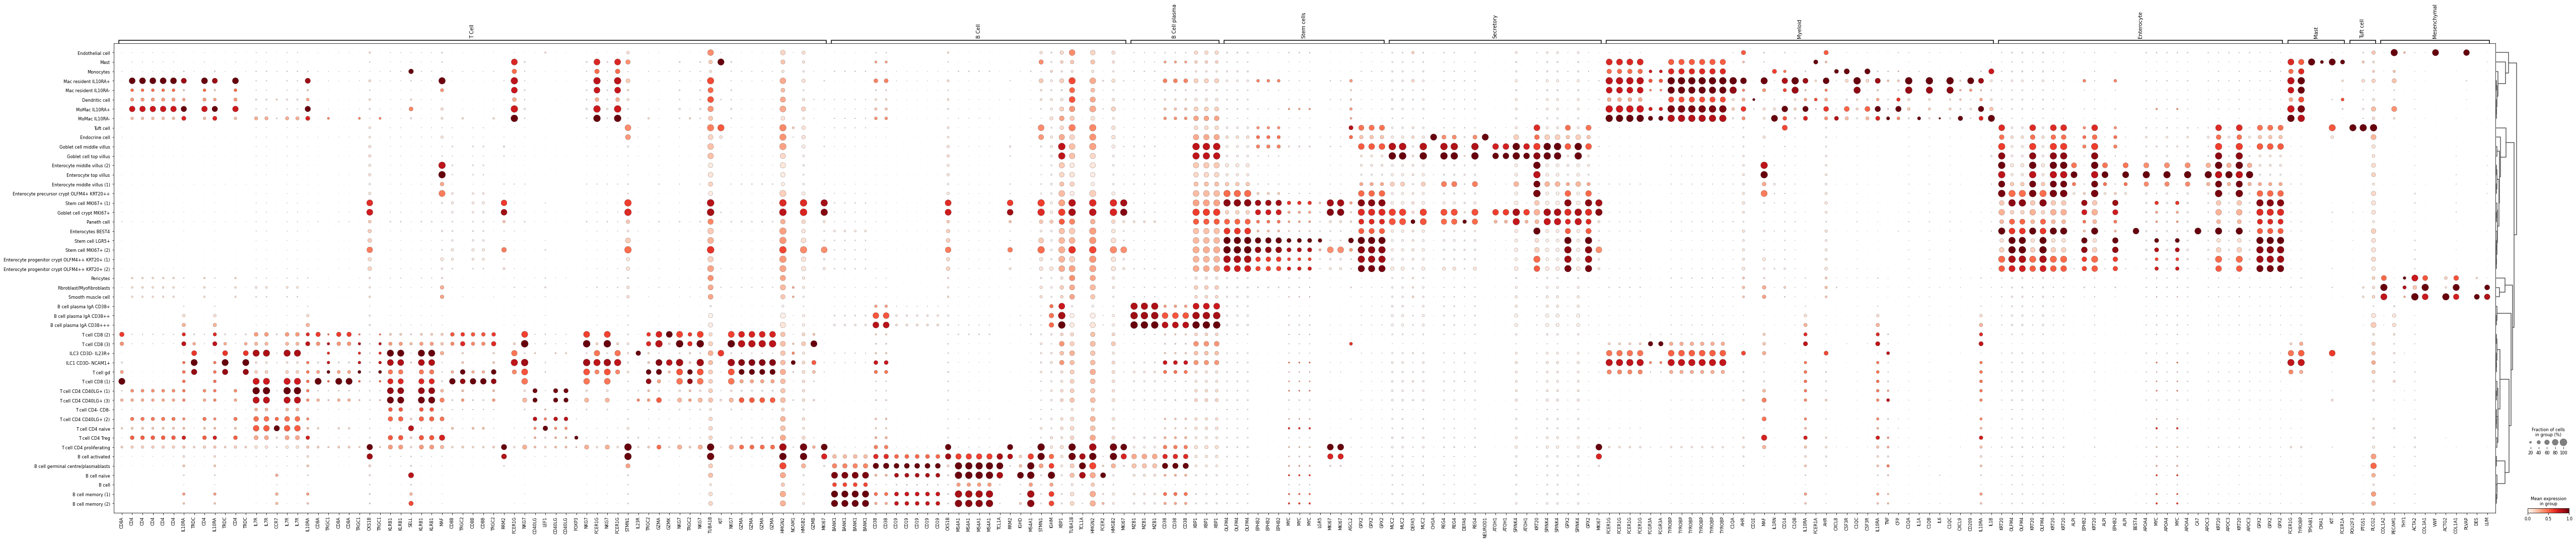

In [52]:
sc.pl.dotplot(adata, out, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=True,
                  standard_scale='var', show=True) 

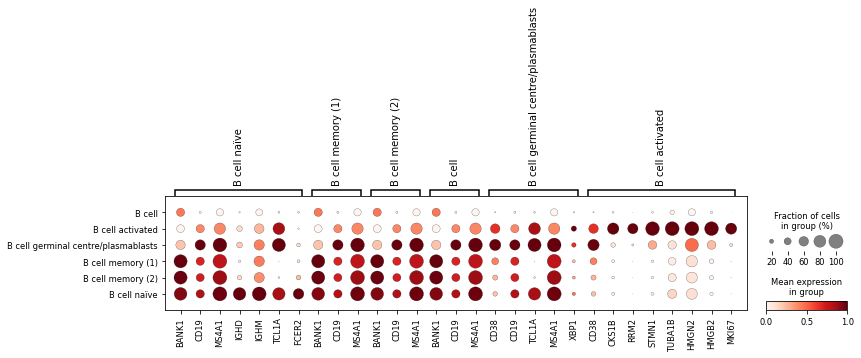

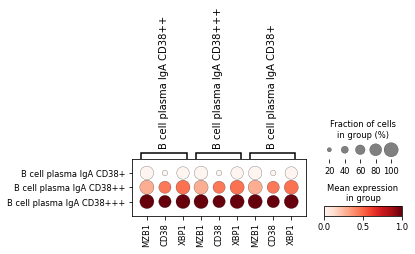

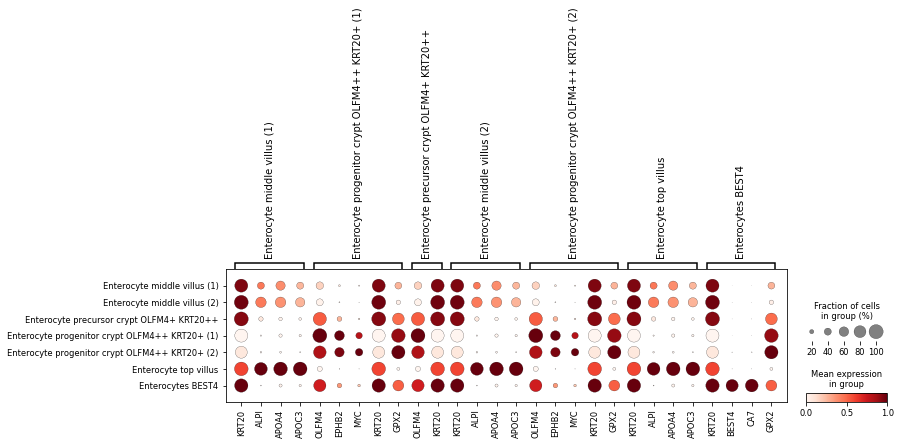

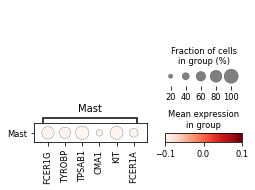

KeyError: "Could not find keys '['CD146']' in columns of `adata.obs` or in adata.raw.var['gene_symbols']."

In [35]:
for i in major_cell_type:
    df3=df2[df2['major_cell_type']==i]
    out = {}                                                               
    for j in df3["cell_type"].tolist(): 
        out[j] = df2[df2["cell_type"]==j]["value"].tolist()  

    adata_sub=adata[adata.obs['major_cell_type']==i]
    #print(adata_sub)
    sc.pl.dotplot(adata_sub, out, groupby='cell_type',
                  gene_symbols='gene_symbols', dendrogram=False,
                  standard_scale='var') 
                   #save="gut_freeze003_markers_Smilie-{}".format(i))